In [1]:
import os
import numpy as np

file_path = "./datasets/2_eggs.csv"
if os.path.exists(file_path):
    print("File exists")
else:
    print("File not found")

File exists


## Question 13.1

In [2]:
import numpy as np

# Loading Data
data_path = "./datasets/2_eggs.csv"
data = np.genfromtxt(data_path, delimiter=",")

# Extracting features and labels from data
X = data[:2, :].T 
y = data[2, :].reshape(-1, 1)

Epoch 1: Cost = 1.8584, Accuracy = 0.5312
Epoch 501: Cost = 0.3417, Accuracy = 0.9062
Epoch 1001: Cost = 0.2596, Accuracy = 0.9271
Epoch 1501: Cost = 0.2264, Accuracy = 0.9375
Epoch 2001: Cost = 0.2089, Accuracy = 0.9375
Epoch 2501: Cost = 0.1938, Accuracy = 0.9375
Epoch 3001: Cost = 0.1760, Accuracy = 0.9479
Epoch 3501: Cost = 0.1604, Accuracy = 0.9479
Epoch 4001: Cost = 0.1366, Accuracy = 0.9479
Epoch 4501: Cost = 0.0922, Accuracy = 0.9688
Epoch 5001: Cost = 0.0558, Accuracy = 1.0000
Epoch 5501: Cost = 0.0376, Accuracy = 1.0000


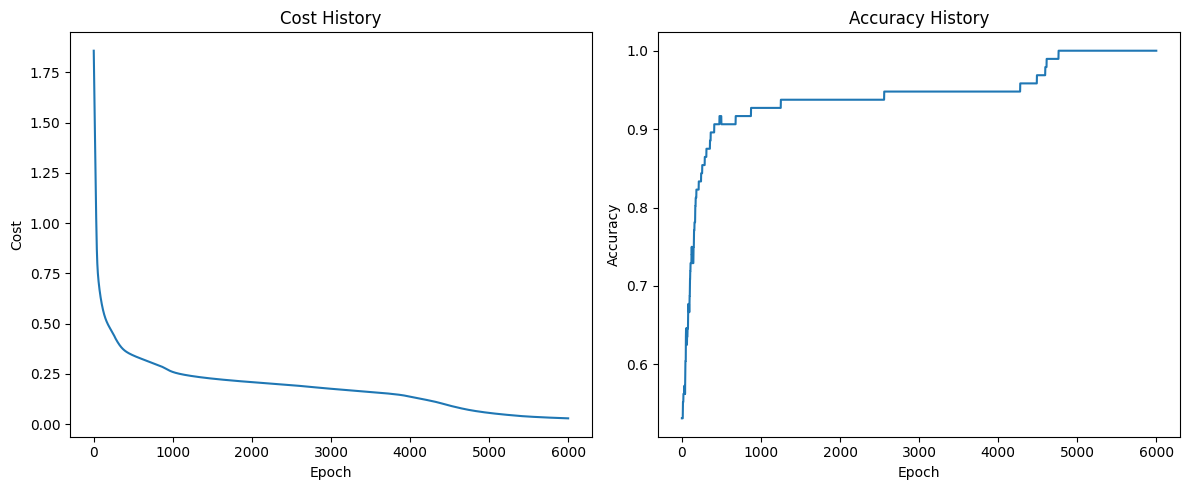

In [3]:
# Hyperparameters
learning_rate = 0.01
epochs = 6000

# Standardize the features
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_mean) / X_std

# Map labels from -1, 1 to 0, 1
y_mapped = (y + 1) / 2

m = y_mapped.shape[0]

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


# Define the tanh activation function
def tanh(x):
    return np.tanh(x)


# Define the derivative of the tanh function
def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# Initialize network parameters
input_size = X.shape[1]
output_size = 1

# Initialize network parameters
hidden_sizes = [10, 10, 10, 10]  # Four hidden layers with 10 neurons each
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_sizes[0])
b1 = np.zeros((1, hidden_sizes[0]))
W2 = np.random.randn(hidden_sizes[0], hidden_sizes[1])
b2 = np.zeros((1, hidden_sizes[1]))
W3 = np.random.randn(hidden_sizes[1], hidden_sizes[2])
b3 = np.zeros((1, hidden_sizes[2]))
W4 = np.random.randn(hidden_sizes[2], hidden_sizes[3])
b4 = np.zeros((1, hidden_sizes[3]))
W5 = np.random.randn(hidden_sizes[3], output_size)
b5 = np.zeros((1, output_size))

# Training the network
new_cost_history = []
new_accuracy_history = []

for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(X_normalized, W1) + b1
    A1 = tanh(Z1)  # tanh activation
    Z2 = np.dot(A1, W2) + b2
    A2 = tanh(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = tanh(Z3)
    Z4 = np.dot(A3, W4) + b4
    A4 = tanh(Z4)
    Z5 = np.dot(A4, W5) + b5
    A5 = sigmoid(Z5)  # Sigmoid activation for output

    # Compute cost
    cost = -(1 / m) * np.sum(y_mapped * np.log(A5) + (1 - y_mapped) * np.log(1 - A5))
    new_cost_history.append(cost)

    # Compute accuracy
    predictions = A5 > 0.5
    accuracy = np.mean(predictions == y_mapped)
    new_accuracy_history.append(accuracy)

    # Backward pass
    dZ5 = A5 - y_mapped
    dW5 = (1 / m) * np.dot(A4.T, dZ5)
    db5 = (1 / m) * np.sum(dZ5, axis=0, keepdims=True)

    dA4 = np.dot(dZ5, W5.T)
    dZ4 = dA4 * tanh_derivative(Z4)
    dW4 = (1 / m) * np.dot(A3.T, dZ4)
    db4 = (1 / m) * np.sum(dZ4, axis=0, keepdims=True)

    dA3 = np.dot(dZ4, W4.T)
    dZ3 = dA3 * tanh_derivative(Z3)
    dW3 = (1 / m) * np.dot(A2.T, dZ3)
    db3 = (1 / m) * np.sum(dZ3, axis=0, keepdims=True)

    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * tanh_derivative(Z2)
    dW2 = (1 / m) * np.dot(A1.T, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * tanh_derivative(Z1)
    dW1 = (1 / m) * np.dot(X_normalized.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)

    # Update parameters
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    W3 -= learning_rate * dW3
    W4 -= learning_rate * dW4
    W5 -= learning_rate * dW5
    b1 -= learning_rate * db1
    b2 -= learning_rate * db2
    b3 -= learning_rate * db3
    b4 -= learning_rate * db4
    b5 -= learning_rate * db5

    if epoch % 500 == 0:
        print(f"Epoch {epoch + 1}: Cost = {cost:.4f}, Accuracy = {accuracy:.4f}")

# # Output the final cost and accuracy
# new_cost_history[-1], new_accuracy_history[-1],

import matplotlib.pyplot as plt

# Plotting the new cost and accuracy history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(new_cost_history)
plt.title("Cost History")
plt.xlabel("Epoch")
plt.ylabel("Cost")

plt.subplot(1, 2, 2)
plt.plot(new_accuracy_history)
plt.title("Accuracy History")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

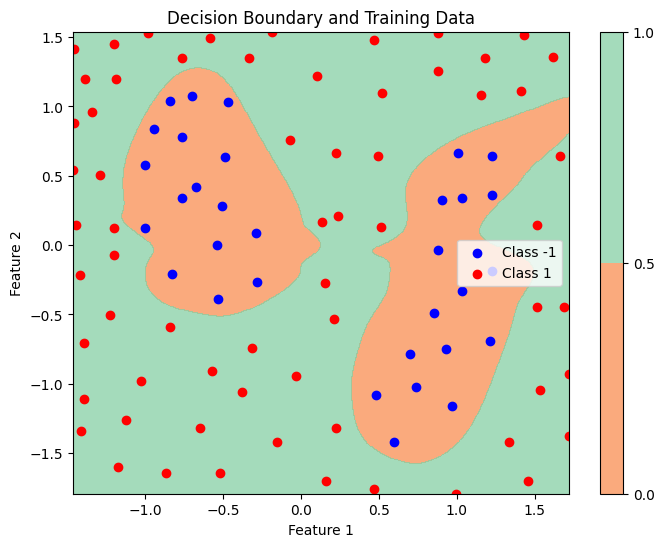

In [4]:
# Visualize the decision boundary
def model_predict(X):
    """Function to perform forward pass and predict labels"""
    Z1 = np.dot(X, W1) + b1
    A1 = tanh(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = tanh(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = tanh(Z3)
    Z4 = np.dot(A3, W4) + b4
    A4 = tanh(Z4)
    Z5 = np.dot(A4, W5) + b5
    A5 = sigmoid(Z5)
    return A5 > 0.5


# Create a mesh grid spanning the range of feature values
grid_x = np.linspace(X_normalized[:, 0].min(), X_normalized[:, 0].max(), 500)
grid_y = np.linspace(X_normalized[:, 1].min(), X_normalized[:, 1].max(), 500)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)

# Flatten the grid to pass into model
grid_flat = np.column_stack((grid_x.ravel(), grid_y.ravel()))

# Predict over the grid
grid_pred = model_predict(grid_flat)
grid_pred = grid_pred.reshape(grid_x.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(grid_x, grid_y, grid_pred, alpha=0.75, cmap=plt.cm.Spectral)
plt.colorbar()

# Plot the original data points
plt.scatter(
    X_normalized[y_mapped.ravel() == 0, 0],
    X_normalized[y_mapped.ravel() == 0, 1],
    color="blue",
    label="Class -1",
)
plt.scatter(
    X_normalized[y_mapped.ravel() == 1, 0],
    X_normalized[y_mapped.ravel() == 1, 1],
    color="red",
    label="Class 1",
)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundary and Training Data")
plt.legend()
plt.show()

## Question 13.2

In [5]:
import numpy as np

# Load the dataset
data_path = "./datasets/3_layercake_data.csv"
data = np.loadtxt(data_path, delimiter=",")

In [6]:
# Split features and labels
X = data[:2].T
y = data[2].astype(int)

# Standardize features
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_scaled = (X - mean) / std


# One-hot encode labels
def one_hot_encode(labels):
    n_classes = np.unique(labels).size
    one_hot = np.zeros((labels.size, n_classes))
    one_hot[np.arange(labels.size), labels] = 1
    return one_hot


y_encoded = one_hot_encode(y)

# # Show preprocessed features and one-hot encoded labels
# X_scaled[:5], y_encoded[:5]

Epoch 0: Loss = 11.4274, Accuracy = 0.1636
Epoch 100: Loss = 0.3055, Accuracy = 0.8455
Epoch 200: Loss = 0.1240, Accuracy = 0.9909


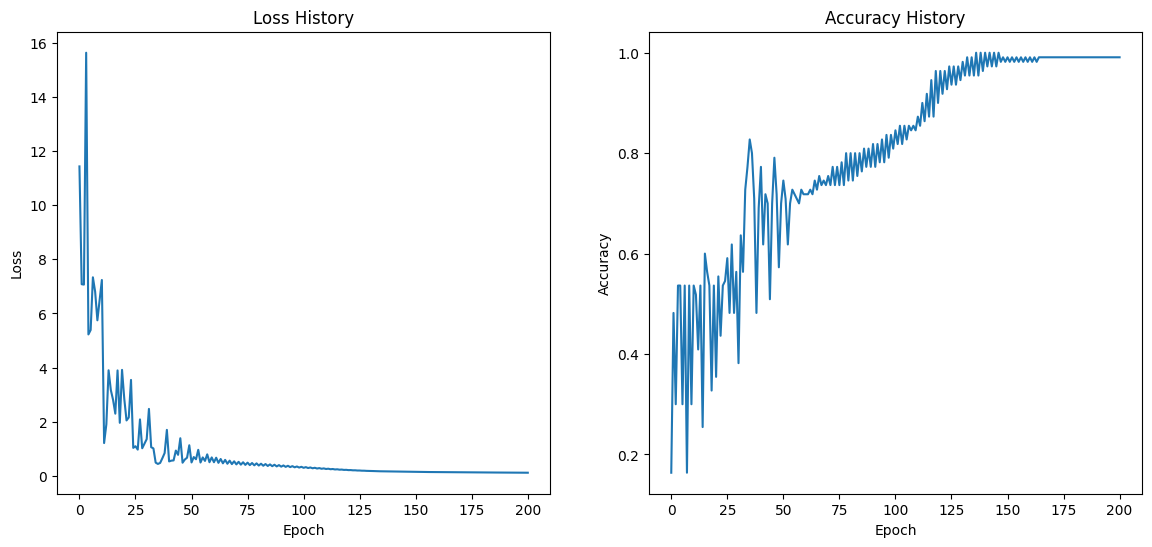

In [7]:
import numpy as np


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)


def compute_loss(y_pred, y_true):
    # Cross-entropy loss
    m = y_true.shape[0]
    loss = -np.mean(np.sum(y_true * np.log(y_pred + 1e-15), axis=1))
    return loss


def accuracy(y_pred, y_true):
    return np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_true, axis=1))


# Network parameters
input_size = X_scaled.shape[1]
hidden_size = 64
output_size = y_encoded.shape[1]
learning_rate = 0.01
epochs = 201

# Weights and biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros(hidden_size)
W2 = np.random.randn(hidden_size, hidden_size)
b2 = np.zeros(hidden_size)
W3 = np.random.randn(hidden_size, output_size)
b3 = np.zeros(output_size)

# Training loop
loss_history = []
accuracy_history = []

for epoch in range(epochs):
    # Forward pass
    Z1 = X_scaled.dot(W1) + b1
    A1 = sigmoid(Z1)
    Z2 = A1.dot(W2) + b2
    A2 = sigmoid(Z2)
    Z3 = A2.dot(W3) + b3
    A3 = softmax(Z3)

    # Compute loss
    loss = compute_loss(A3, y_encoded)
    acc = accuracy(A3, y_encoded)
    loss_history.append(loss)
    accuracy_history.append(acc)

    # Backpropagation
    dZ3 = A3 - y_encoded
    dW3 = A2.T.dot(dZ3)
    db3 = np.sum(dZ3, axis=0)

    dA2 = dZ3.dot(W3.T)
    dZ2 = dA2 * A2 * (1 - A2)
    dW2 = A1.T.dot(dZ2)
    db2 = np.sum(dZ2, axis=0)

    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * A1 * (1 - A1)
    dW1 = X_scaled.T.dot(dZ1)
    db1 = np.sum(dZ1, axis=0)

    # Update weights and biases
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {acc:.4f}")

(loss_history, accuracy_history)

import matplotlib.pyplot as plt

# Plotting loss and accuracy history
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title("Accuracy History")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.show()

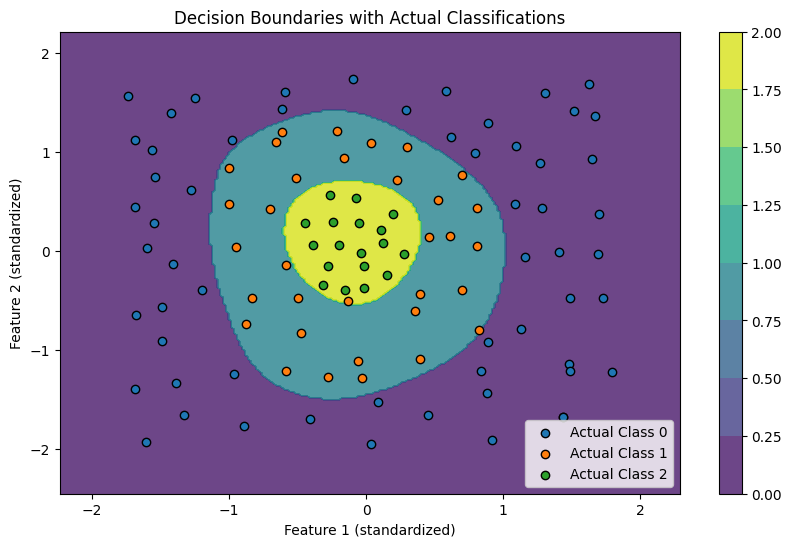

In [8]:
# Visualizing the decision boundaries

# Create a mesh grid on the feature space
x_min, x_max = X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5
y_min, y_max = X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Forward pass to predict over the mesh grid
Z1 = np.c_[xx.ravel(), yy.ravel()].dot(W1) + b1
A1 = sigmoid(Z1)
Z2 = A1.dot(W2) + b2
A2 = sigmoid(Z2)
Z3 = A2.dot(W3) + b3
A3 = softmax(Z3)
Z = np.argmax(A3, axis=1).reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))

# Contour plot for the boundaries
plt.contourf(xx, yy, Z, alpha=0.8)
plt.colorbar()

# Scatter plot for actual labels
for i in range(len(np.unique(y))):
    plt.scatter(
        X_scaled[y == i, 0],
        X_scaled[y == i, 1],
        label=f"Actual Class {i}",
        edgecolors="k",
    )

plt.title("Decision Boundaries with Actual Classifications")
plt.xlabel("Feature 1 (standardized)")
plt.ylabel("Feature 2 (standardized)")
plt.legend()
plt.show()